# IS362 Final Project
## Data analysis of the US Energy Information Administration (EIA)
### Anthony Paveglio
---
The EIA is a federal agency associated witht he US Department of Energy. The EIA is responsible for collecting data regarding various forms of energy in the US including fossil fuels, renewable energy, and a global outlook on energy and its impact. The usage, production, and transportation of forms of energy are tracked through the EIA.

- **Fossil Fuel** is a form of energy such as Petroleum, natural gas, and coal.
 - Petroleum includes crude oil and refined oil products.
- **Renewable Energy** is an energy source that emits little or no $CO_{2}$ such as hydroelectric, wind, solar, geothermal, biomass, and various forms of biofuel.
 - Also called clean energy or sustainable energy.

This project will examine the usage of fossil fuels and renewable forms of energy in the United States. Renewable energy can reduce the amount of $CO_{2}$ emissions and provide energy solutions that do not have an adverse impact on the environment. Renewable energy can significantly reduce greenhouse gasses and reduce forms of air pollution. In the United States both fossil fuels and renewable energy are produced and used for energy demands.

---

# 1. Libraries and Imported files

In [310]:
#Necessary libraries and imports
import sys
import requests
import json
import pandas
import seaborn
import numpy
import datetime
import matplotlib
import matplotlib.pyplot
import ipywidgets
import csv

# 2. API Access Request and Handling
## Making a connection with US EIA data sources.

In [311]:
categoryData = requests.get(
    "http://api.eia.gov/category/?api_key=ba1598e22a90a4bb48e3c5bdc55db041&category_id=371&out=json")

print 'Response code from EIA API:', categoryData.status_code, categoryData.reason
print 'Amount of time required for request:', categoryData.elapsed

Response code from EIA API: 200 OK
Amount of time required for request: 0:00:00.173506


## Functions to convert EIA data to usable Python data

In [312]:
def JSONtoDataFrameEIA(APIResponse, columnTitles=None):
    #Takes the returned data from the API call and converts it into a usable dataframe
    #EIA responses contain the actual data and a list of headers embedded in JSON
    #Also converts all string date data to a usable datetime
    #The EIA structures their dates as 'yyyymm'
    #Example: 202001 = 2020/1 = January 2020

    #Parameters:
    #    APIResponse (mixed): The API response to be parsed into a DataFrame.
    #    columnTitles (list, optional): List of column titles to apply over the Dataframe's columns
    #         if the columnTitles are not specified in the function call, default titles will be
    #         assigned based on the data within the returned API call data

    #Returns:
    #    EIADataFrame(DataFrame): EIA Data parsed into a Dataframe
    
    EIADataFrame = pandas.DataFrame(APIResponse.json()['series'][0]['data'])

    if columnTitles:
        EIADataFrame.columns = columnTitles
    else:
        EIADataFrame.columns = ['Date', APIResponse.json()['series'][0]['name']]

    if len(EIADataFrame['Date'][0]) == 6:
        EIADataFrame['Date'] = pandas.to_datetime(EIADataFrame['Date'], format='%Y%m')
    elif len(EIADataFrame['Date'][0]) == 4:
        EIADataFrame['Date'] = pandas.to_datetime(EIADataFrame['Date'], format='%Y')

    return EIADataFrame

def JSONheadersEIA(APIResponse):
    headerData = APIResponse.json()['series'][0]
    return headerData

## Functions for handling other misc. processes

In [313]:
def normalizeDataFrame(dataframe):
    #Normalizes all data from ranges of 0.1 to 1.0 within a dataframe

    #Parameters:
    #    dataframe (DataFrame): The pandas DataFrame to be normalized containing numerical data

    #Returns:
    #     (DataFrame): Same dataframe with normalized data accross all cells
    return ((dataframe - dataframe.min()) / (dataframe.max() - dataframe.min()))

def standardizeDataFrame(dataframe):
    #Standardizes all data within dataframe from positive and negative ranges

    #Parameters:
    #    dataframe (DataFrame): The pandas DataFrame to be standardized containing numerical data

    #Returns:
    #     (DataFrame): Same dataframe with standardized data accross all cells
    return ((dataframe - dataframe.mean())/dataframe.std())

# 3. Energy Usage in the United States
## Reviewing Fossil and Renewable sources
Lets compare the usage of both fossil fuels and renewable energy consumption in the United States. First we need to request the data series from the EIA via the API. This will return the latest dataset available.

In [314]:
fossilFuelGeneric = requests.get(
    "http://api.eia.gov/series/?api_key=ba1598e22a90a4bb48e3c5bdc55db041&series_id=TOTAL.FFTCBUS.M")
renewablesGeneric = requests.get(
    "http://api.eia.gov/series/?api_key=ba1598e22a90a4bb48e3c5bdc55db041&series_id=TOTAL.RETCBUS.M")
carbonDioxideUSA = requests.get(
    "http://api.eia.gov/series/?api_key=ba1598e22a90a4bb48e3c5bdc55db041&series_id=EMISS.CO2-TOTV-TT-TO-US.A")

The data returned from the EIA is contained in a JSON format. In Section 2 of this Jupyter Notebook a function was created to handle parsing data from the EIA JSON format to retrieve the data from JSON and form it into a Jupyter Notebook. Below the EIA data will be formed into two sets of data titled _fossilFuelData_ and _renewablesData_. These DataFrames will contain the dates and units of fuel consumed for each recorded date

In [315]:
fossilFuelData = JSONtoDataFrameEIA(fossilFuelGeneric)
renewablesData = JSONtoDataFrameEIA(renewablesGeneric)

Merging these dataframes using _pandas.merge_ will combine the data found in both DataFrames into one which will make it easier to compare the amount of renewable versus fossil fuels consumed. Merging dataframes by specifying the _on_ keyword in the merge function will combine the data based on the date.

In [316]:
fuelData = pandas.merge(left=fossilFuelData, right=renewablesData, on='Date')

#This will display the last 25 months of recorded data for both Fossil Fuel and Renewable Energy consumption
display(fuelData.head(25))

,Date,"Total Fossil Fuels Consumption, Monthly","Total Renewable Energy Consumption, Monthly"
0,2020-01-01,7204.205,972.738
1,2019-12-01,7174.573,947.972
2,2019-11-01,6764.463,910.772
3,2019-10-01,6379.894,922.997
4,2019-09-01,6272.004,883.759
5,2019-08-01,6849.707,934.983
6,2019-07-01,6820.898,975.007
7,2019-06-01,6174.786,996.219
8,2019-05-01,6136.590,1059.511
9,2019-04-01,5958.825,1023.090


Using a pivot table it is possible to compare the data in a much more easy to read format. Instead of viewing each month row by row with the pivot chart we can focus on the data of a period of time. By specifying the year only as part of the date for the index of the pivot table the data can be analyzed on a year by year basis instead of each month.

    index=fuelData["Date"].dt.year
    
the _aggfunc_ property defines which function to perform over the pivot table data. For this analysis lets review the total units of fuel consumed for each year for both fossil fuels and renewable sources. calling numpy.sum will perform a sum of all consumed fuel and chart it by year.

    aggfunc=numpy.sum

Finally, since 2020 is in progress and the data is very insignificant it will not be included on this pivot table. It is possible to exclude 2020 data by calling the pivot_table function on the fuelData DataFrame and specifying to only show results where the Data column is less than the year 2020.

    fuelData[fuelData['Date'] < '2020']
    
Here are the results:

In [317]:
pivotFuelData = fuelData[fuelData['Date'] < '2020'].pivot_table(
    values=["Total Fossil Fuels Consumption, Monthly",
            "Total Renewable Energy Consumption, Monthly"],
    index=fuelData["Date"].dt.year,
    aggfunc=numpy.sum)

display(pivotFuelData)

,"Total Fossil Fuels Consumption, Monthly","Total Renewable Energy Consumption, Monthly"
Date,,
1973,70282.079,4410.937
1974,67871.940,4741.852
1975,65323.405,4687.121
1976,69070.873,4727.150
1977,70950.267,4208.967
1978,71809.332,5005.441
1979,72844.236,5122.854
1980,69779.558,5428.342
1981,67518.799,5413.688


### Quick Select Slider Widget

In [318]:
def dynamicPivotTable(year):
    display(pivotFuelData.loc[year])

ipywidgets.interact(dynamicPivotTable, year=ipywidgets.IntSlider(min=1973, 
                                                                 max=2019, 
                                                                 step=1,
                                                                 description='Fuel Year:'));

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xOTczLCBkZXNjcmlwdGlvbj11J0Z1ZWwgWWVhcjonLCBtYXg9MjAxOSwgbWluPTE5NzMpLCBPdXRwdXQoKSksIF9kb21fY2zigKY=


The pivot table displays a year by year comparison of renewable energy consumption and fossil fuel consumption side by side. It is no question that renewable energy is not a primary fuel source however it looks as if renewable energy has increased in its demand through out the 2010s. The largest values of renewable energy consumption were all present in the 2010 decade. We can plot this pivot table to visualize the results.

Since the values are vastly different, with fossil fuel consumption being signfiicantly larger each year versus renewable fuel there will be two graphs to visualize changes in energy usage. The top graph will display the change in both fossil and renewable sources based on their actual units. The bottom graph will apply **standardization** to the data found in the pivot table for a different visiual of the same data. Using data standardization it will be much easier to visualize the trends found within the data. Instead of just plotting the usage of energy standaization will display changes in how fossil fuels and renewable fuels are used. Even though the usage of renewable fuels has not been greater than fossil fuels the standardization chart will show the changes in usage and where renewable fuels begin to outpace fossil fuels in growth.

This function will standardize the data found within the pivot table for the bottom chart.

    standardizeDataFrame(pivotFuelData)

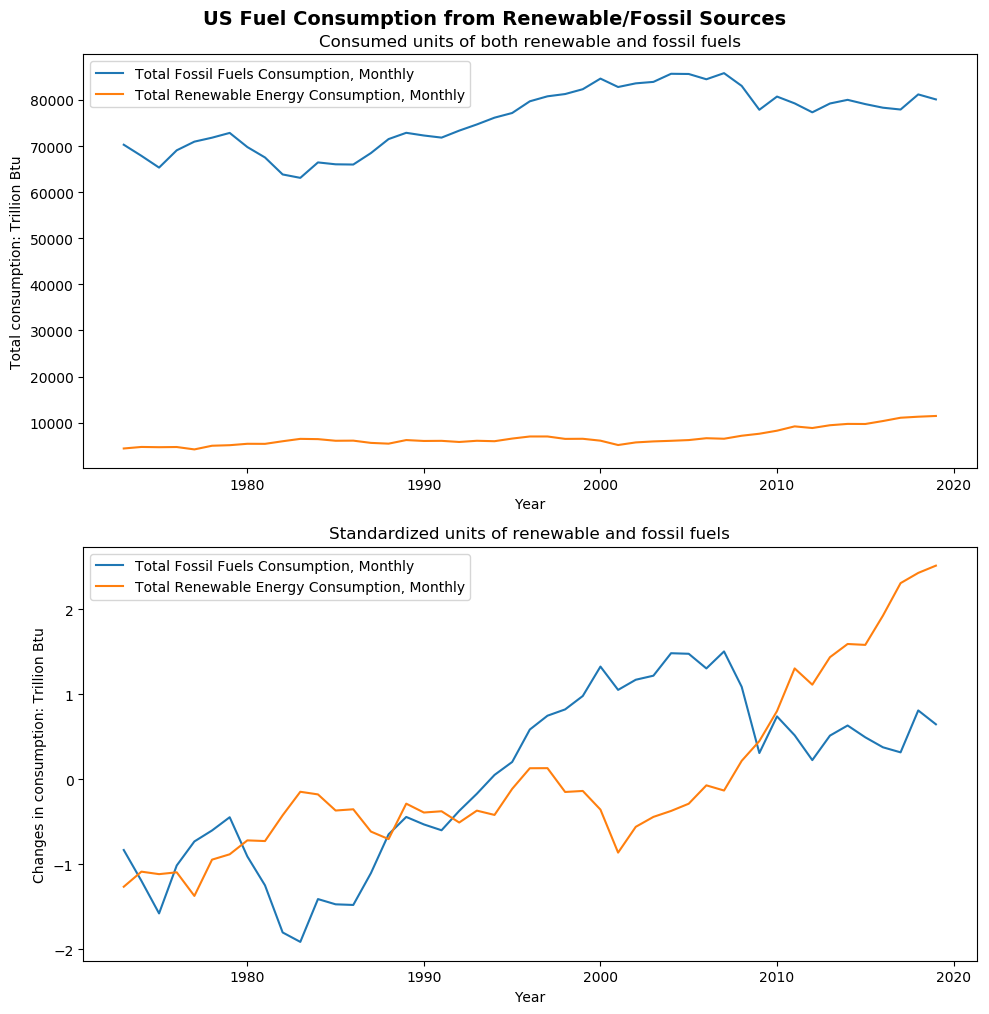

In [319]:
#Extract units
#Units are the same for both energy measurements
#So we only need the units from one JSON header
units = JSONheadersEIA(fossilFuelGeneric)['units']

#Overall graph properties
figure, (axisTop, axisBottom) = matplotlib.pyplot.subplots(2, figsize=(10, 10), dpi=100)
figure.suptitle('US Fuel Consumption from Renewable/Fossil Sources', 
                fontsize=14, 
                fontweight='bold',
               y=1.01)

#Top Chart attributes
legendTop = axisTop.plot(pivotFuelData)
axisTop.set_title("Consumed units of both renewable and fossil fuels")
axisTop.set_ylabel(str('Total consumption: '+units))
axisTop.set_xlabel('Year')

#Bottom Chart attributes
legendBottom = axisBottom.plot(standardizeDataFrame(pivotFuelData))
axisBottom.set_title("Standardized units of renewable and fossil fuels")
axisBottom.set_ylabel(str('Changes in consumption: '+units))
axisBottom.set_xlabel('Year')

#Spacing adjustment
#figure.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
figure.tight_layout()
legendLabels = pivotFuelData.columns
axisTop.legend(legendTop, legendLabels)
axisBottom.legend(legendBottom, legendLabels)

The good news is that it looks like there is a change in the type of fuel used in the United States. Even though clean renewable energy still is not used nearly as much as fossil fuels there is a strong increase in the amount of renewable fuels being used. Renewable energy has also become a larger part of the total fuel usage of the United States as compared to when data collection began from the EIA. The pie charts below display the usage of fossil and renewable energy in 1973 and the usage again in 2019. Renewable energy is still a small piece but has more than doubled in how much is used.

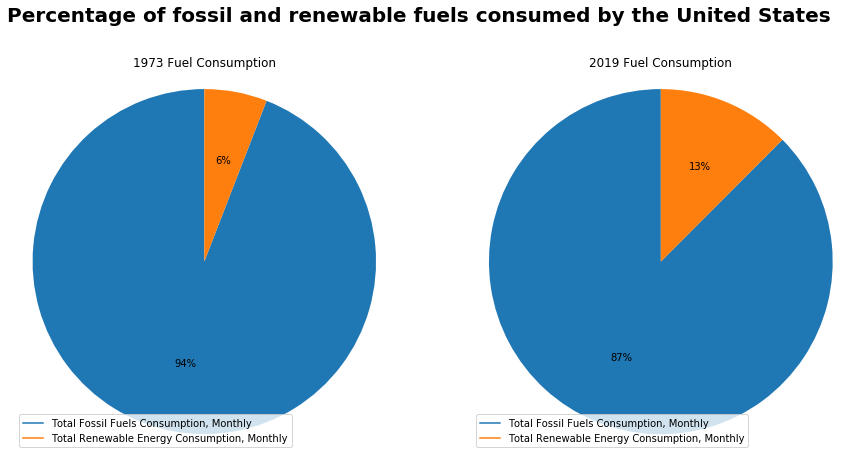

In [320]:
#Piechart Creation
pieFigure, (pieAxisLeft, pieAxisRight) = matplotlib.pyplot.subplots(1, 2, figsize=(15,7))

#Piechart Data 1973 Consumption
pieAxisLeft.pie(pivotFuelData.loc[1973], autopct='%1.0f%%', startangle=90)
pieAxisLeft.axis('equal')
pieAxisLeft.set_title("1973 Fuel Consumption")

#Piechart Data for 1973 Consumption
pieAxisRight.pie(pivotFuelData.loc[2019], autopct='%1.0f%%', startangle=90)
pieAxisRight.axis('equal')
pieAxisRight.set_title("2019 Fuel Consumption")

pieFigure.suptitle('Percentage of fossil and renewable fuels consumed by the United States', 
                fontsize=20, 
                fontweight='bold',
               y=1.01)

legendLabels = pivotFuelData.columns
pieAxisLeft.legend(legendTop, legendLabels)
pieAxisRight.legend(legendBottom, legendLabels)

## Observing CO2 Emissions in the US

After reviewing trends in fossil fuel and renewable energy usage in the United States, the EIA also provides emissions data. CO2 Emissions data is broken down by sector, state, or an aggregation of the United States as a whole. We will observe CO2 emissions accross the entire United States. This data from the EIA only spans from 1980 until 2017 which is a shorter range from the previous data sets which spanned from 1973 until 2019. The following data is reformed into a pivot table which displays the sum of emissions for the year. The measurements are in millions of metric tons.

In [321]:
co2Data = JSONtoDataFrameEIA(carbonDioxideUSA)

pivotCo2Data = co2Data[co2Data['Date'] < '2020'].pivot_table(
    values=["Total carbon dioxide emissions from all sectors, all fuels, United States"],
    index=co2Data["Date"].dt.year,
    aggfunc=numpy.sum)

display(pivotCo2Data)

,"Total carbon dioxide emissions from all sectors, all fuels, United States"
Date,
1980,4814.620555
1981,4674.427223
1982,4418.632452
1983,4397.187100
1984,4616.192333
1985,4616.938467
1986,4620.120254
1987,4766.139566
1988,4998.441580


Observing both the data from the pivot table and the chart below there has been a halt in the increase of CO2 emissions in the US. However, levels of CO2 emissions are well above the point when data collection began.

Text(0.5,0,'Year')

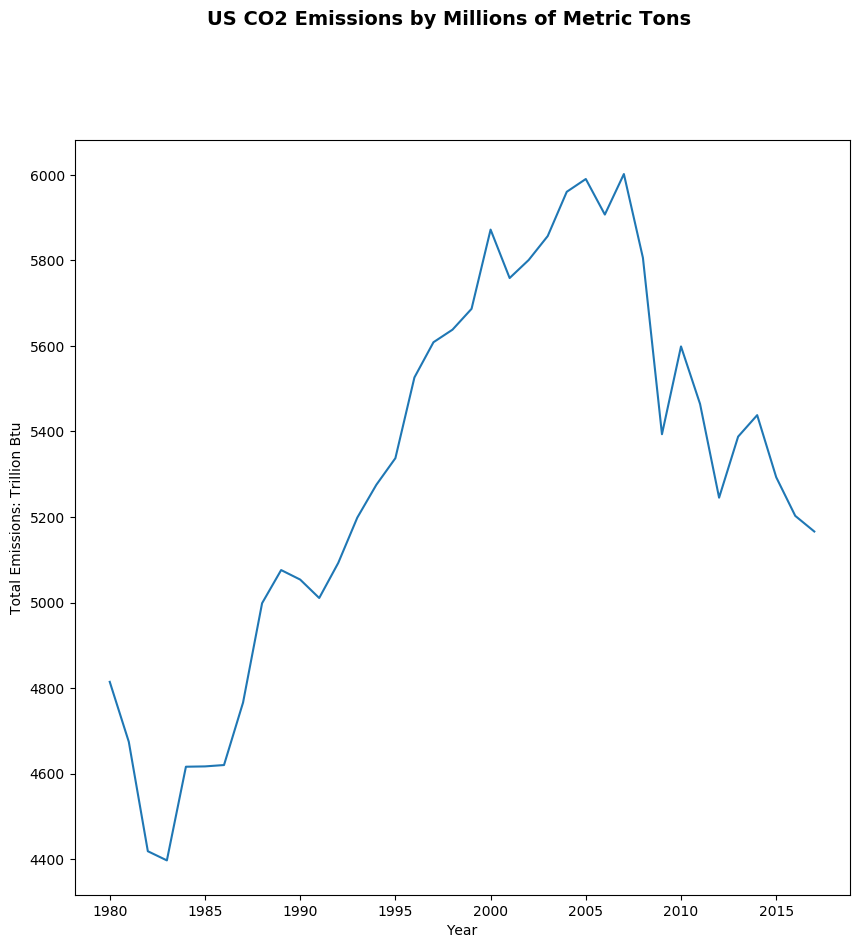

In [322]:
figureCO2, axisCO2 = matplotlib.pyplot.subplots(figsize=(10, 10), dpi=100)
figureCO2.suptitle('US CO2 Emissions by Millions of Metric Tons', 
                fontsize=14, 
                fontweight='bold',
               y=1.01)

axisCO2.plot(pivotCo2Data)
axisCO2.set_ylabel(str('Total Emissions: '+units))
axisCO2.set_xlabel('Year')

Lets pair this data with the previous dataframe comparing fossil fuel and renewable energy consumption in the US. This will allow for an esay comparison between the usage of fuels and the emissions of CO2 in the environment.

In [323]:
fuelAndCO2 = pandas.merge(left=pivotFuelData, right=pivotCo2Data, on='Date')

display(fuelAndCO2)

,"Total Fossil Fuels Consumption, Monthly","Total Renewable Energy Consumption, Monthly","Total carbon dioxide emissions from all sectors, all fuels, United States"
Date,,,
1980,69779.558,5428.342,4814.620555
1981,67518.799,5413.688,4674.427223
1982,63835.902,5979.637,4418.632452
1983,63096.873,6495.613,4397.187100
1984,66445.834,6437.862,4616.192333
1985,66035.699,6084.015,4616.938467
1986,65985.926,6111.138,4620.120254
1987,68475.240,5621.807,4766.139566
1988,71507.884,5456.754,4998.441580


All of the data is now side by side in the same dataframe. Since the CO2 emissions data was contained to a shorter range than the fuel consumption data the fuel data will only be measured from 1980 until 2017. Since the measurements are different for fuel consumption and CO2 emissions (Fuel Consumption: British Thermal Units, CO2 Emissions: Metric Tons) simply plotting this data will not yield useful results. Once again choosing to standardize all data and plot the results will highlight trends and changes accross fuels consumed and the emissions of CO2.

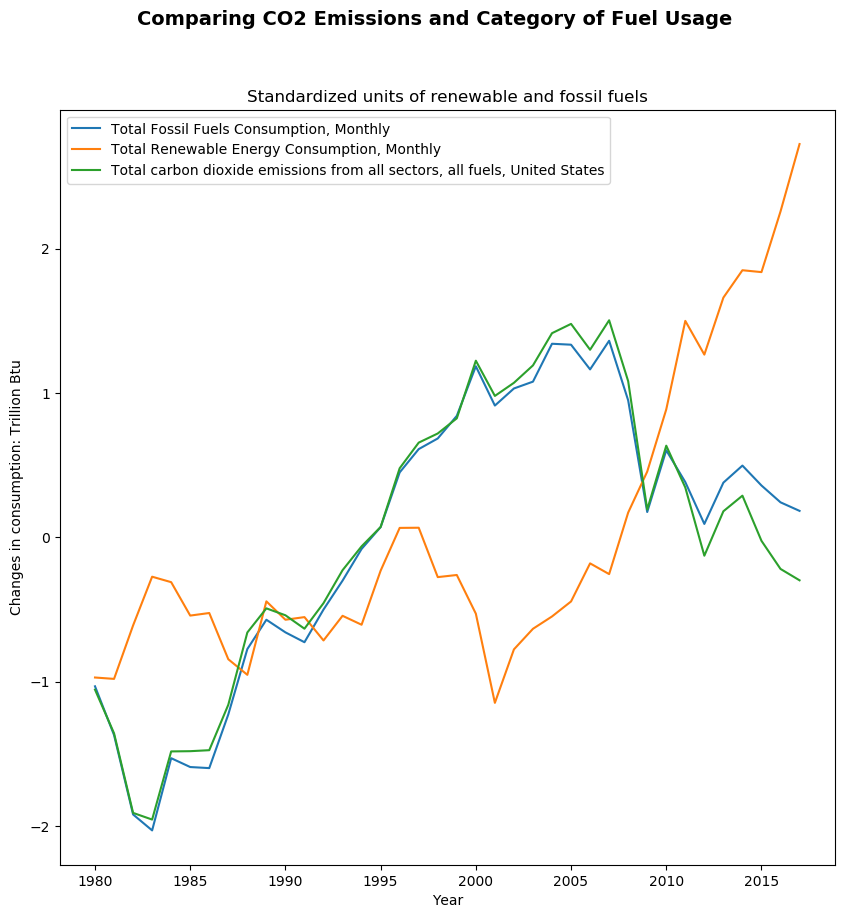

In [324]:
figureFuelCO2, axisFuelCO2  = matplotlib.pyplot.subplots(figsize=(10, 10), dpi=100)
figureFuelCO2.suptitle('Comparing CO2 Emissions and Category of Fuel Usage', 
                fontsize=14, 
                fontweight='bold')

legendFuelCO2 = axisFuelCO2.plot(standardizeDataFrame(fuelAndCO2))
axisFuelCO2.set_title("Standardized units of renewable and fossil fuels")
axisFuelCO2.set_ylabel(str('Changes in consumption: '+units))
axisFuelCO2.set_xlabel('Year')

legendLabels = fuelAndCO2.columns
axisFuelCO2.legend(legendFuelCO2, legendLabels)

After standardizing the fuel consumption and CO2 emissions data there is a clear trend in the changes of fuel usage in the United States and the amount of harmful CO2 emissions into the atmnosphere. As the amount of fossil fuel consumed changes the amount of CO2 released into the environment also changes. Increases and decreases in fossil fuel usage and the changes in the release of CO2 are very closely connected. Fortunately, CO2 emissions are falling with the decreasing usage of fossil fuels and increasing use of renewable energy.

### Emissions Data from EPA

In [325]:
epaEmissionsData = pandas.read_csv ('EmissionsData.csv')

epaEmissionsData = epaEmissionsData.transpose()

epaEmissionsData.columns = ['Carbon Dioxide', 'Methane', 'Nitrous Oxide', 'Fluorinated Gases', 'Total']

epaEmissionsData.drop('Gas', axis=0)

,Carbon Dioxide,Methane,Nitrous Oxide,Fluorinated Gases,Total
1990,5128.3,774.41,434.624,99.6657,6437
1991,5078.89,778.861,424.828,90.6813,6373.26
1992,5182.71,777.754,424.348,95.2777,6480.09
1993,5283.44,765.963,452.371,95.0037,6596.77
1994,5377.03,772.161,437.56,98.9769,6685.73
1995,5438.91,764.998,449.258,117.854,6771.02
1996,5626.91,757.631,460.857,129.008,6974.41
1997,5703.71,741.834,446.663,136.601,7028.8
1998,5751.05,726.7,446.989,153.009,7077.75
1999,5830.3,708.861,436.401,150.049,7125.61
